In [1]:
 import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
df = pd.read_csv("Diabetes Classification.csv")


In [7]:
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


In [8]:
df.shape

(128, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         128 non-null    int64  
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  128 non-null    object 
 7   Smoking                     128 non-null    object 
 8   Diet                        128 non-null    object 
 9   Exercise                    128 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.1+ KB


In [10]:
df.describe()

,Age,BMI,FBS,HbA1c
count,128.000000,128.000000,128.000000,128.000000
mean,42.031250,35.359375,162.500000,7.887500
std,16.783915,14.981739,61.323975,2.146339
min,12.000000,10.000000,80.000000,5.000000
25%,28.000000,24.000000,120.000000,6.400000
50%,40.000000,34.000000,160.000000,7.800000
75%,55.000000,45.500000,205.000000,9.375000
max,75.000000,67.000000,280.000000,12.000000


In [11]:
df.isnull().sum()

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
123    False
124    False
125    False
126    False
127    False
Length: 128, dtype: bool

In [13]:
# Numeric features to be scaled
numeric_features = ['Age', 'BMI', 'FBS', 'HbA1c']

# Create the scaler (StandardScaler)
scaler = StandardScaler()

# Scale the numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Print the scaled dataset
print(df)

scaled_values = scaler.fit_transform(df[numeric_features])

# Create a DataFrame to store the scaled values
scaled_df = pd.DataFrame(scaled_values, columns=numeric_features)

# Export the DataFrame to a CSV file
scaled_df.to_csv('standard_scale_values.csv', index=False)

          Age  Gender       BMI Blood Pressure       FBS     HbA1c  \
0    0.177576    Male -0.694184         Normal -1.023182 -1.023182   
1    0.775725  Female -0.359133           High -0.695764 -0.695764   
2    1.373875    Male -0.024082           High -0.368345 -0.368345   
3    1.972025  Female  0.310969           High -0.040927 -0.040927   
4   -0.121499    Male -1.029235         Normal -1.350600 -1.350600   
..        ...     ...       ...            ...       ...       ...   
123 -1.497243  Female -1.364286         Normal -1.023182 -1.023182   
124 -1.198169    Male -1.096245         Normal -0.695764 -0.695764   
125 -0.899094  Female -0.761194           High -0.368345 -0.368345   
126 -0.600019    Male -0.426143           High -0.040927 -0.040927   
127 -0.300944  Female -0.091092           High  0.286491  0.286491   

    Family History of Diabetes Smoking     Diet Exercise Diagnosis  
0                           No      No  Healthy  Regular        No  
1                    

In [14]:
def bar_chart(feature):
    Diabetic = df[df["Diagnosis"] == "Yes"][feature].value_counts()
    NonDiabetic = df[df["Diagnosis"] == "No"][feature].value_counts()
    dff = pd.DataFrame([Diabetic, NonDiabetic])
    dff.index = ['Diabetic', 'NonDiabetic']
    ax = dff.plot(kind='bar', stacked=True, figsize=(10, 5))
    ax.set_title(feature)

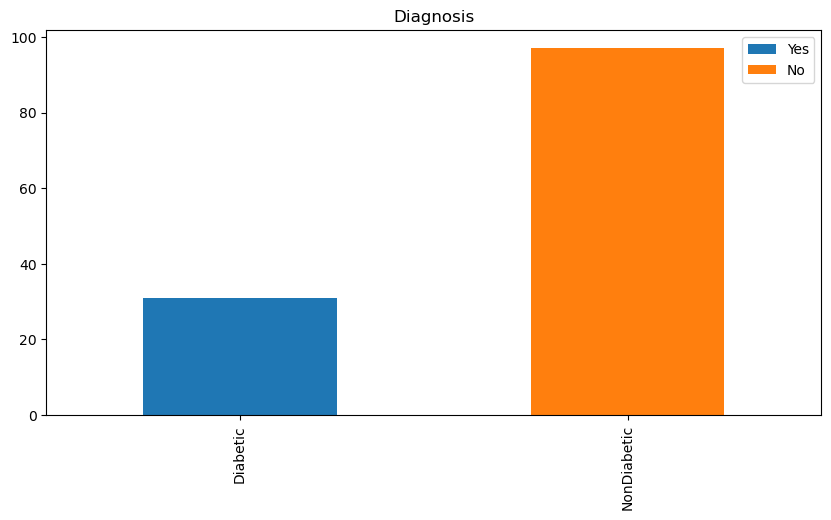

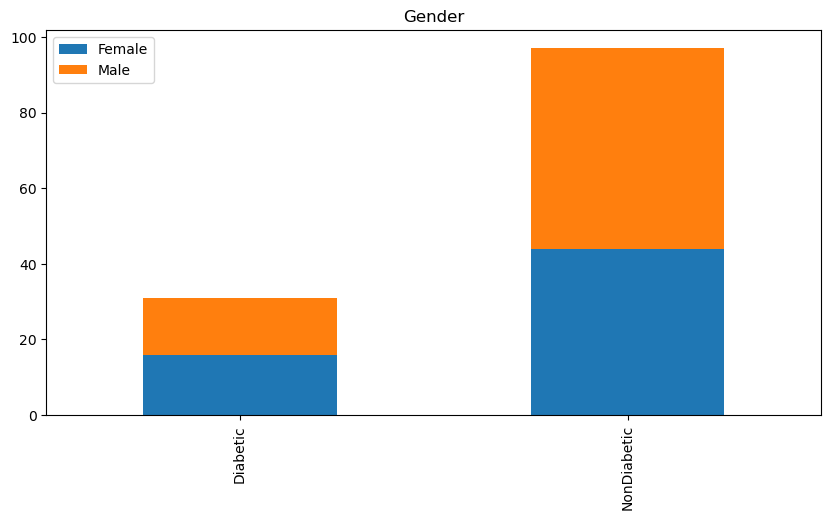

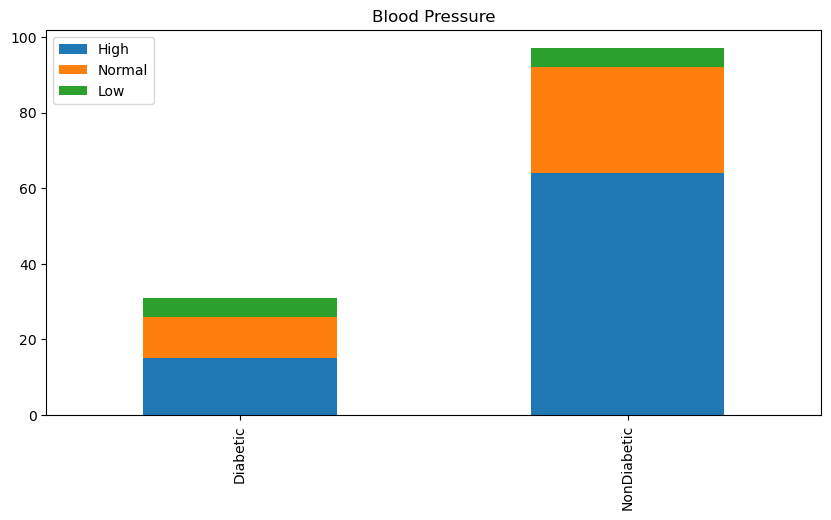

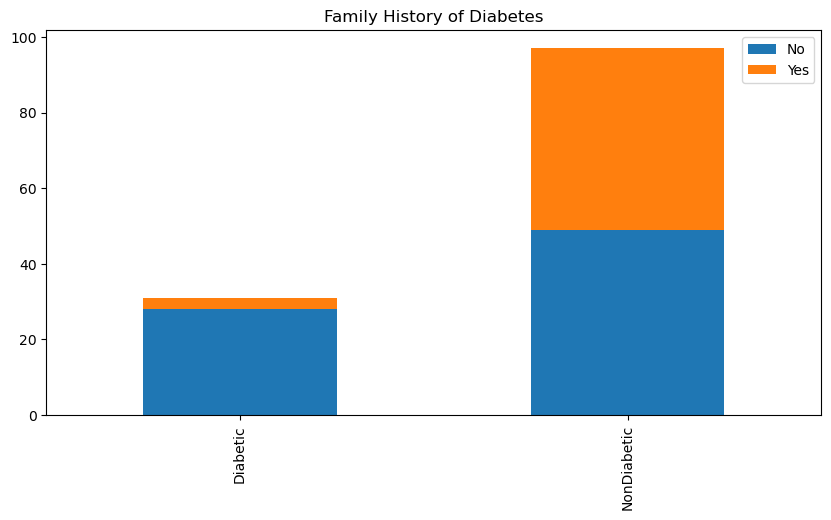

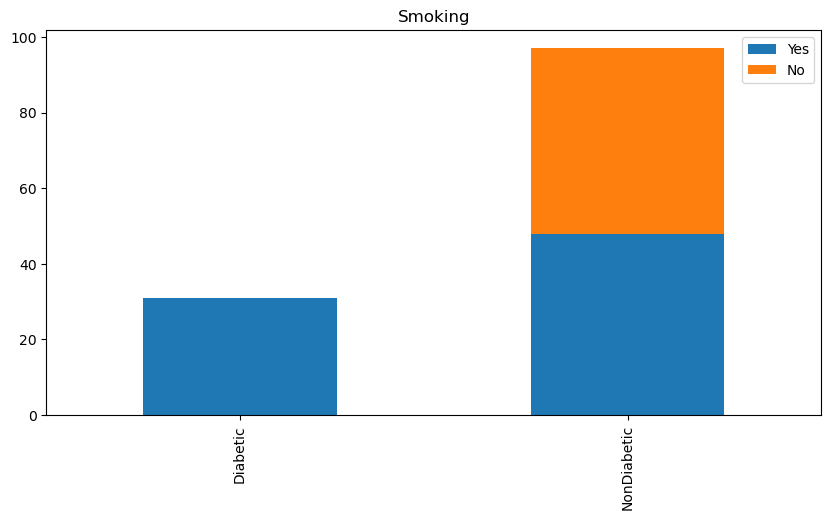

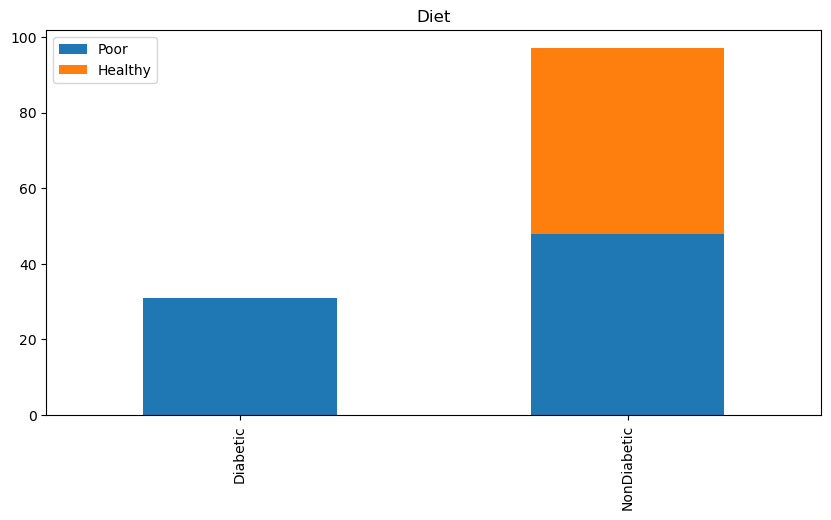

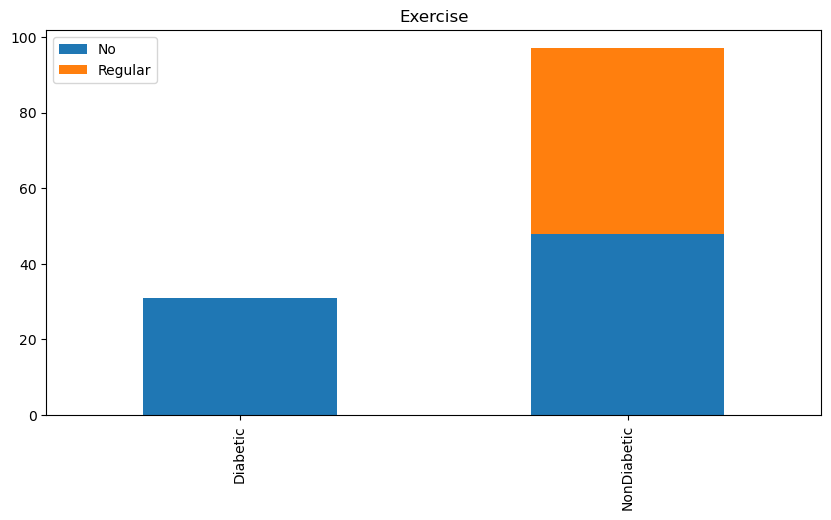

In [15]:
bar_chart("Diagnosis")
bar_chart("Gender")
bar_chart("Blood Pressure")
bar_chart("Family History of Diabetes")
bar_chart("Smoking")
bar_chart("Diet")
bar_chart("Exercise")

In [16]:
encoder = LabelEncoder()
for column in df.columns:
    df[column] = encoder.fit_transform(df[column])
    
df.to_csv('encoded_data.csv', index=False)

In [17]:
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,19,1,8,2,1,1,0,0,0,1,0
1,25,0,11,0,2,2,1,1,1,0,1
2,31,1,14,0,3,3,1,1,1,0,1
3,34,0,17,0,4,4,1,1,1,0,1
4,16,1,5,2,0,0,0,0,0,1,0


In [18]:
df.describe()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,17.101562,0.531250,14.039062,0.687500,4.125000,4.125000,0.398438,0.617188,0.617188,0.382812,0.242188
std,9.794615,0.500983,8.928767,0.911432,3.066199,3.066199,0.491500,0.487983,0.487983,0.487983,0.430091
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,7.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,1.000000,13.000000,0.000000,4.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,25.000000,1.000000,20.250000,2.000000,6.250000,6.250000,1.000000,1.000000,1.000000,1.000000,0.000000
max,34.000000,1.000000,33.000000,2.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         128 non-null    int64
 1   Gender                      128 non-null    int32
 2   BMI                         128 non-null    int64
 3   Blood Pressure              128 non-null    int32
 4   FBS                         128 non-null    int64
 5   HbA1c                       128 non-null    int64
 6   Family History of Diabetes  128 non-null    int32
 7   Smoking                     128 non-null    int32
 8   Diet                        128 non-null    int32
 9   Exercise                    128 non-null    int32
 10  Diagnosis                   128 non-null    int32
dtypes: int32(7), int64(4)
memory usage: 7.6 KB


In [20]:
# Split the dataset into features (X) and target (y)
X = df.iloc[:, :-1]
y = df['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and predict using KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_pred)

# Train and predict using Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_cm = confusion_matrix(y_test, dt_pred)

# Train and predict using Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_pred)

# Train and predict using Gaussian Naive Bayes
g = GaussianNB()
g.fit(X_train, y_train)
g_pred = g.predict(X_test)
g_cm = confusion_matrix(y_test, g_pred)

# Train and predict using Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_pred)

# Print the confusion matrix for each classifier
print("KNN Confusion Matrix:")
print(knn_cm)
print("\nDecision Tree Confusion Matrix:")
print(dt_cm)
print("\nRandom Forest Confusion Matrix:")
print(rf_cm)
print("\nGaussian Naive Bayes Confusion Matrix:")
print(g_cm)
print("\nSVM Confusion Matrix:")
print(svm_cm)

KNN Confusion Matrix:
[[13  7]
 [ 6  0]]

Decision Tree Confusion Matrix:
[[18  2]
 [ 0  6]]

Random Forest Confusion Matrix:
[[18  2]
 [ 0  6]]

Gaussian Naive Bayes Confusion Matrix:
[[ 9 11]
 [ 0  6]]

SVM Confusion Matrix:
[[20  0]
 [ 6  0]]


In [21]:
print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("\nGaussian Naive Bayes Classification Report:")
print(classification_report(y_test, g_pred))
print("\nSVM Classification Report:")
print(classification_report(y_test, g_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.00      0.00      0.00         6

    accuracy                           0.50        26
   macro avg       0.34      0.33      0.33        26
weighted avg       0.53      0.50      0.51        26


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.75      1.00      0.86         6

    accuracy                           0.92        26
   macro avg       0.88      0.95      0.90        26
weighted avg       0.94      0.92      0.93        26


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.75      1.00      0.86         6

    accuracy                           0.92        26
   macro avg       0.88  

In [23]:
# Split the dataset into features (X) and target (y)
X = df.iloc[:, :-1]
y = df['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and predict using KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_pred)
knn_accuracy = accuracy_score(y_test, knn_pred) * 100

# Train and predict using Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_cm = confusion_matrix(y_test, dt_pred)
dt_accuracy = accuracy_score(y_test, dt_pred) * 100

# Train and predict using Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred) * 100

# Train and predict using Gaussian Naive Bayes
g = GaussianNB()
g.fit(X_train, y_train)
g_pred = g.predict(X_test)
g_cm = confusion_matrix(y_test, g_pred)
g_accuracy = accuracy_score(y_test, g_pred) * 100

# Train and predict using Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_pred)
svm_accuracy = accuracy_score(y_test, svm_pred) * 100

# Print the confusion matrix for each classifier
print("KNN Confusion Matrix:")
print(knn_cm)
print("\nDecision Tree Confusion Matrix:")
print(dt_cm)
print("\nRandom Forest Confusion Matrix:")
print(rf_cm)
print("\nGaussian Naive Bayes Confusion Matrix:")
print(g_cm)
print("\nSVM Confusion Matrix:")
print(svm_cm)

# Print the classification report for each classifier
print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("\nGaussian Naive Bayes Classification Report:")
print(classification_report(y_test, g_pred))
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))

# Print the accuracy of each model in percentage
print("\nKNN Accuracy: {:.2f}%".format(knn_accuracy))
print("Decision Tree Accuracy: {:.2f}%".format(dt_accuracy))
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy))
print("Gaussian Naive Bayes Accuracy: {:.2f}%".format(g_accuracy))
print("SVM Accuracy: {:.2f}%".format(svm_accuracy))

KNN Confusion Matrix:
[[13  7]
 [ 6  0]]

Decision Tree Confusion Matrix:
[[18  2]
 [ 0  6]]

Random Forest Confusion Matrix:
[[18  2]
 [ 0  6]]

Gaussian Naive Bayes Confusion Matrix:
[[ 9 11]
 [ 0  6]]

SVM Confusion Matrix:
[[20  0]
 [ 6  0]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.00      0.00      0.00         6

    accuracy                           0.50        26
   macro avg       0.34      0.33      0.33        26
weighted avg       0.53      0.50      0.51        26


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.75      1.00      0.86         6

    accuracy                           0.92        26
   macro avg       0.88      0.95      0.90        26
weighted avg       0.94      0.92      0.93        26


Random Forest Classification Repor

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
